# Assignment 2: Classification

## Import required libraries

In [1]:
import os
import numpy as np
import pandas as pd

import sklearn.linear_model
import sklearn.tree
import sklearn.metrics

from matplotlib import pyplot as plt
import seaborn as sns

## Starter code students need to edit

In [2]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    ''' Compute counts of four possible outcomes of a binary classifier for evaluation.
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : float
        Number of true positives
    TN : float
        Number of true negatives
    FP : float
        Number of false positives
    FN : float
        Number of false negatives
    '''
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    for i, ytrue_i in enumerate(ytrue_N):
        if(ytrue_i == 1 and yhat_N[i] == 1): TP = TP + 1
        if(ytrue_i == 1 and yhat_N[i] == 0): FN = FN + 1
        if(ytrue_i == 0 and yhat_N[i] == 0): TN = TN + 1
        if(ytrue_i == 0 and yhat_N[i] == 1): FP = FP + 1
        
    return TP, TN, FP, FN

### Testing the  calc_TP_TN_FP_FN

In [3]:
N = 8
ytrue_N = np.asarray([0., 0., 0., 0., 1., 1., 1., 1.])
yhat_N  = np.asarray([0., 0., 1., 0., 1., 1., 0., 0.])
TP, TN, FP, FN = calc_TP_TN_FP_FN(ytrue_N, yhat_N)
print("TP:",TP)
print("TN:",TN)
print("FP:",FP)
print("FN:",FN)
print(np.allclose(TP + TN + FP + FN, N))

TP: 2.0
TN: 3.0
FP: 1.0
FN: 2.0
True


# Starter code that should be used as is.

No need to edit these functions!

In [4]:
def calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute performance metrics for a given probabilistic classifier and threshold
    '''
    tp, tn, fp, fn = calc_TP_TN_FP_FN(ytrue_N, yproba1_N >= thresh)
    ## Compute ACC, TPR, TNR, etc.
    acc = (tp + tn) / float(tp + tn + fp + fn + 1e-10)
    tpr = tp / float(tp + fn + 1e-10)
    tnr = tn / float(fp + tn + 1e-10)
    ppv = tp / float(tp + fp + 1e-10)
    npv = tn / float(tn + fn + 1e-10)
    
    return acc, tpr, tnr, ppv, npv

def print_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Pretty print perf. metrics for a given probabilistic classifier and threshold
    '''
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
    
    ## Pretty print the results
    print("%.3f ACC" % acc)
    print("%.3f TPR" % tpr)
    print("%.3f TNR" % tnr)
    print("%.3f PPV" % ppv)
    print("%.3f NPV" % npv)

In [5]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

In [6]:
def compute_perf_metrics_across_thresholds(ytrue_N, yproba1_N, thresh_grid=None):
    ''' Compute common binary classifier performance metrics across many thresholds
    
    If no array of thresholds is provided, will use all 'unique' values
    in the yproba1_N array to define all possible thresholds with different performance.
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset

    Returns
    -------
    thresh_grid : 1D array of floats
        One entry for each possible threshold
    perf_dict : dict, with key, value pairs:
        * 'acc' : 1D array of accuracy values (one per threshold)
        * 'ppv' : 1D array of positive predictive values (one per threshold)
        * 'npv' : 1D array of negative predictive values (one per threshold)
        * 'tpr' : 1D array of true positive rates (one per threshold)
        * 'tnr' : 1D array of true negative rates (one per threshold)
    '''
    if thresh_grid is None:
        bin_edges = np.linspace(0, 1.001, 21)
        thresh_grid = np.sort(np.hstack([bin_edges, np.unique(yproba1_N)]))
    tpr_grid = np.zeros_like(thresh_grid)
    tnr_grid = np.zeros_like(thresh_grid)
    ppv_grid = np.zeros_like(thresh_grid)
    npv_grid = np.zeros_like(thresh_grid)
    acc_grid = np.zeros_like(thresh_grid)
    for tt, thresh in enumerate(thresh_grid):
        # Apply specific threshold to convert probas into hard binary values (0 or 1)
        # Then count number of true positives, true negatives, etc.
        # Then compute metrics like accuracy and true positive rate
        acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
        acc_grid[tt] = acc
        tpr_grid[tt] = tpr
        tnr_grid[tt] = tnr
        ppv_grid[tt] = ppv
        npv_grid[tt] = npv
    return thresh_grid, dict(
        acc=acc_grid,
        tpr=tpr_grid,
        tnr=tnr_grid,
        ppv=ppv_grid,
        npv=npv_grid)

def make_plot_perf_vs_threshold(ytrue_N, yproba1_N, bin_edges=np.linspace(0, 1, 21)):
    ''' Make pretty plot of binary classifier performance as threshold increases
    
    Produces a plot with 3 rows:
    * top row: hist of predicted probabilities for negative examples (shaded red)
    * middle row: hist of predicted probabilities for positive examples (shaded blue)
    * bottom row: line plots of metrics that require hard decisions (ACC, TPR, TNR, etc.)
    '''
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
    sns.distplot(
        yproba1_N[ytrue_N == 0],
        color='r', bins=bin_edges, kde=False, rug=True, ax=axes[0]);
    sns.distplot(
        yproba1_N[ytrue_N == 1],
        color='b', bins=bin_edges, kde=False, rug=True, ax=axes[1]);

    thresh_grid, perf_grid = compute_perf_metrics_across_thresholds(ytrue_N, yproba1_N)
    axes[2].plot(thresh_grid, perf_grid['acc'], 'k-', label='accuracy')
    axes[2].plot(thresh_grid, perf_grid['tpr'], 'b-', label='TPR (recall/sensitivity)')
    axes[2].plot(thresh_grid, perf_grid['tnr'], 'g-', label='TNR (specificity)')
    axes[2].plot(thresh_grid, perf_grid['ppv'], 'c-', label='PPV (precision)')
    axes[2].plot(thresh_grid, perf_grid['npv'], 'm-', label='NPV')
    
    axes[2].legend()
    axes[2].set_ylim([0, 1])

# Problem 1: Binary Classifier for Cancer-Risk Screening

### Load the dataset

In [7]:
# Load 3 feature version of x arrays
x_tr_M3 = np.loadtxt('data_cancer/x_train.csv', delimiter=',', skiprows=1)
x_va_N3 = np.loadtxt('data_cancer/x_valid.csv', delimiter=',', skiprows=1)
x_te_N3 = np.loadtxt('data_cancer/x_test.csv', delimiter=',', skiprows=1)

# 2 feature version of x arrays
x_tr_M2 = x_tr_M3[:, :2].copy()
x_va_N2 = x_va_N3[:, :2].copy()
x_te_N2 = x_te_N3[:, :2].copy()

In [8]:
y_tr_M = np.loadtxt('data_cancer/y_train.csv', delimiter=',', skiprows=1)
y_va_N = np.loadtxt('data_cancer/y_valid.csv', delimiter=',', skiprows=1)
y_te_N = np.loadtxt('data_cancer/y_test.csv', delimiter=',', skiprows=1)

## Problem 1a: Data Exploration

### **1a(i):** What fraction of the provided patients have cancer in the training set, the validation set, and the test set? 

In [9]:
print(y_tr_M.size)
y_tr_unique,y_tr_counts = np.unique(y_tr_M,return_counts=1)
print(y_tr_unique,y_tr_counts)

print(y_va_N.size)
y_va_unique,y_va_counts = np.unique(y_va_N,return_counts=1)
print(y_va_unique,y_va_counts)

print(y_te_N.size)
y_te_unique,y_te_counts = np.unique(y_te_N,return_counts=1)
print(y_te_unique,y_te_counts)

print("frac has_cancer on TRAIN: %.3f" % (y_tr_counts[1]/y_tr_M.size) ) # TODO edit the printed values
print("frac has_cancer on VALID: %.3f" % (y_va_counts[1]/y_va_N.size) )
print("frac has_cancer on TEST : %.3f" % (y_te_counts[1]/y_te_N.size) )

390
[0. 1.] [335  55]
180
[0. 1.] [155  25]
180
[0. 1.] [155  25]
frac has_cancer on TRAIN: 0.141
frac has_cancer on VALID: 0.139
frac has_cancer on TEST : 0.139


In [10]:
print(pd.DataFrame(x_tr_M3).describe())

                0           1           2
count  390.000000  390.000000  390.000000
mean    64.921885    0.164103    1.012221
std      4.831631    0.370844    1.011603
min     45.303590    0.000000    0.000531
25%     61.763733    0.000000    0.300800
50%     65.087790    0.000000    0.702928
75%     68.277820    0.000000    1.402915
max     79.766530    1.000000    6.721334


### **1a(ii):** Looking at the features data contained in the training set 𝑥 array, what feature preprocessing (if any) would you recommend to improve a decision tree's performance?

**Answer**: We must look for missing values and handle them, scale the features, check for correlation between the features as we know thta tth edecision tree is a logical model.

### 1a(iii): Looking at the features data contained in the training set 𝑥 array, what feature preprocessing (if any) would you recommend to improve logistic regression's performance?

**Answer**: The same thing applies here, We have to look for missing values and handle them, scale our features, look for correlation as the logistic Regression is a problistic model

## Problem 1b: The predict-0-always baseline

### Problem 1b(i): Compute the accuracy of the predict-0-always classifier on validation and test set

In [11]:
print("acc on VALID: %.3f" % (y_va_counts[0]/y_va_N.size)) # TODO edit values!
print("acc on TEST : %.3f" % (y_te_counts[0]/y_va_N.size))

acc on VALID: 0.861
acc on TEST : 0.861


### Problem 1b(ii): Print a confusion matrix for predict-0-always on the validation set.

In [12]:
# TODO call print(calc_confusion_matrix_for_threshold(...))
calc_confusion_matrix_for_threshold(y_va_N, np.zeros(y_va_N.size), thresh=1)

Predicted    0  1
True             
0          155  0
1           25  0

### Problem 1b(iii): This classifier gets pretty good accuracy! Why wouldn't we want to use it?

**Answer**:  it always predict zeros , the sensivity , precision as it equal to zero , if calculate the f1_score which present the real accuracy of the model using 2 x [(Precision x Recall) / (Precision + Recall)] it will be low so we can use the this model

### Problem 1b(iv): For the intended application (screening patients before biopsy), describe the possible mistakes the classifier can make in task-specific terms. What costs does each mistake entail (lost time? lost money? life-threatening harm?). How do you recommend evaluating the classifier to be mindful of these costs?


**Answer**: Working on the data cancner data, We want to predict if a person have cancer or not and We wanto high accuracy prediction, so we are hoping to reduce the error of (FN, FP), but We can not decrease the error so much, e.g. if a man have cancer but the model predict that he doesn't have cancer, doing so will cost him time and his life, while if a man is healthy but the model predicts that he has cancer, it will aslo cost him time and money so by thinking about logical the loss of money is better than loss of life, hence It the model will be baised becase FP is more important than FN, so we will change the threshold so the decision boundary also changes.

## 1c : Logistic Regression

### Model Fitting for 1c(i)

In [13]:
C_grid = np.logspace(-9, 6, 31)
# 2-feature
tr_loss_list = list()
va_loss_list = list()
for C in C_grid:
    # TODO fit, predict_proba, and evaluate logistic loss
    lr = sklearn.linear_model.LogisticRegression(C=C)
    model = lr.fit(x_tr_M2,y_tr_M)
    pred_tr = model.predict_proba(x_tr_M2)
    tr_loss_list.append(sklearn.metrics.log_loss(y_tr_M,pred_tr))
    pred_va = model.predict_proba(x_va_N2)
    va_loss_list.append(sklearn.metrics.log_loss(y_va_N,pred_va))    
# Record the best model here
print(tr_loss_list)

print(va_loss_list)

bestC = np.argmin(va_loss_list)
print("The C for the model is ",np.argmin(va_loss_list))

[0.4068208375797142, 0.4068205701389862, 0.40681972407129724, 0.4068170489679098, 0.40680859167570366, 0.40678185641466225, 0.40669744011711584, 0.4064317392339509, 0.4056038690271016, 0.4031031283060512, 0.39621753776750784, 0.3813703271923013, 0.3619762448967392, 0.34950735902206015, 0.34548368801773166, 0.34448812208643775, 0.3438944278238768, 0.34346927661995685, 0.3433269626298021, 0.3433026958768976, 0.3432997487694172, 0.34329943401388985, 0.34329940188281843, 0.34329939866319015, 0.343299398339115, 0.34329939830669104, 0.34329939830348266, 0.3432993983031701, 0.34329939830314143, 0.3432993983031395, 0.3432993983031394]
[0.4029601751013718, 0.4029599431528289, 0.40295920157537324, 0.40295686224767663, 0.40294947004707876, 0.4029260951416148, 0.4028523016886295, 0.40262011949779847, 0.4018975218144944, 0.39972265243742505, 0.3938038738372083, 0.38152004684433366, 0.36738990239433694, 0.3617867575394682, 0.36284998461855367, 0.3637924742552152, 0.3627205432145956, 0.36073004411102

### **1c(i):** Apply your logistic regression code to the "2 feature" $x$ data, and make a plot of logistic loss (y-axis) vs. C (x-axis) on the training set and validation set. Which value of $C$ do you prefer? 

best C for LR with 2 feature data: 30.000


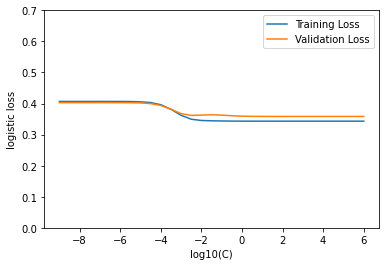

In [14]:
# TODO make plot
plt.xlabel('log10(C)');
plt.ylabel('logistic loss');
plt.ylim([0.0, 0.7]);
plt.plot(np.log10(C_grid),tr_loss_list)
plt.plot(np.log10(C_grid),va_loss_list)

# TODO add legend
#plt.legend(...);
plt.legend(["Training Loss","Validation Loss"]);

print("best C for LR with 2 feature data: %.3f" % bestC) # TODO


### **1c(ii):** Make a performance plot that shows how good your probabilistic predictions from the best 1c(i) classifier are on the validation set. 

C:\Users\aashr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aashr\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\aashr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aashr\anaconda3\lib\site-packages\seaborn\distr

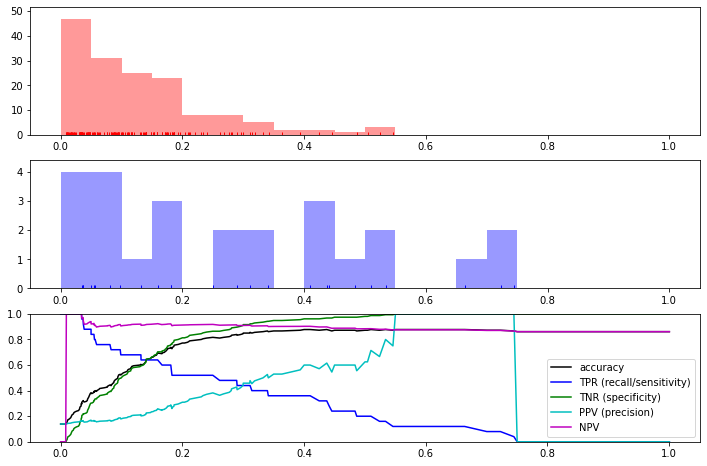

In [15]:
# TODO call make_plot_perf_vs_threshold(...)
lr2 = sklearn.linear_model.LogisticRegression(C = C_grid[bestC])
bestModel2 = lr2.fit(x_tr_M2,y_tr_M)
pred_va2 = bestModel2.predict_proba(x_va_N2)[::,1]

make_plot_perf_vs_threshold(y_va_N,pred_va2)

### Model fitting for 1c(iii)

In [16]:
# TODO like 1c(i) but with 3 features

In [17]:
C_grid = np.logspace(-9, 6, 31)
# 3-feature
tr_loss_list = list()
va_loss_list = list()
for C in C_grid:
    # TODO fit, predict_proba, and evaluate logistic loss
    lr = sklearn.linear_model.LogisticRegression(C=C)
    model = lr.fit(x_tr_M3,y_tr_M)
    pred_tr = model.predict_proba(x_tr_M3)
    tr_loss_list.append(sklearn.metrics.log_loss(y_tr_M,pred_tr))
    pred_va = model.predict_proba(x_va_N3)
    va_loss_list.append(sklearn.metrics.log_loss(y_va_N,pred_va))    
# Record the best model here
print(tr_loss_list)
print(va_loss_list)

bestC = np.argmin(va_loss_list)
print("The C for the model is ",np.argmin(va_loss_list))

[0.4068208334913831, 0.40682055712648024, 0.40681968327602924, 0.40681691967542083, 0.40680818204638813, 0.4067805667779788, 0.40669334946858504, 0.40641881281778564, 0.4055629746677968, 0.40297419238217785, 0.39581249937104124, 0.3801197161393119, 0.35829277731804954, 0.3396718698795487, 0.3243875362025408, 0.31246432075874486, 0.3070196046070269, 0.30539396193334434, 0.30502970121001016, 0.3049735439833494, 0.30496688214765455, 0.3049661727033956, 0.3049661006574078, 0.3049660934414209, 0.3049660927078099, 0.30496609263306057, 0.3049660926258149, 0.30496609262523683, 0.304966092625197, 0.30496609262519936, 0.3049660926252016]
[0.40296017012853647, 0.4029599254957977, 0.4029591538956096, 0.4029567059728262, 0.4029489726733087, 0.40292453078825885, 0.40284734416657436, 0.4026044496312558, 0.4018479072493915, 0.39956575590989035, 0.3933068129769462, 0.3799503119092921, 0.36255391672533954, 0.3480352820186612, 0.3308896422777364, 0.31019397214784544, 0.29509394651117565, 0.28687879272284

### **1c(iii):** Plot of logistic loss (y-axis) vs. C (x-axis) on the training set and validation set. Which value of $C$ do you prefer? 

best C for LR with 3 feature data: 30.000


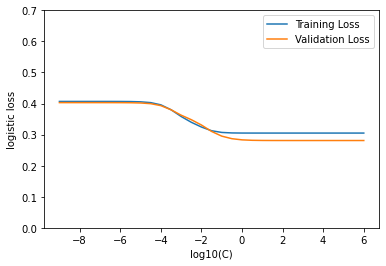

In [18]:
# TODO make plot
plt.xlabel('log10(C)');
plt.ylabel('logistic loss');
plt.ylim([0.0, 0.7]);
plt.plot(np.log10(C_grid),tr_loss_list)
plt.plot(np.log10(C_grid),va_loss_list)

# TODO add legend
#plt.legend(...);
plt.legend(["Training Loss","Validation Loss"]);

print("best C for LR with 3 feature data: %.3f" % bestC) # TODO


### Problem 1c(iv):  Make a performance plot that shows how good your probabilistic predictions from the best 1c(iii) classifier are on the validation set.  

C:\Users\aashr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aashr\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\aashr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aashr\anaconda3\lib\site-packages\seaborn\distr

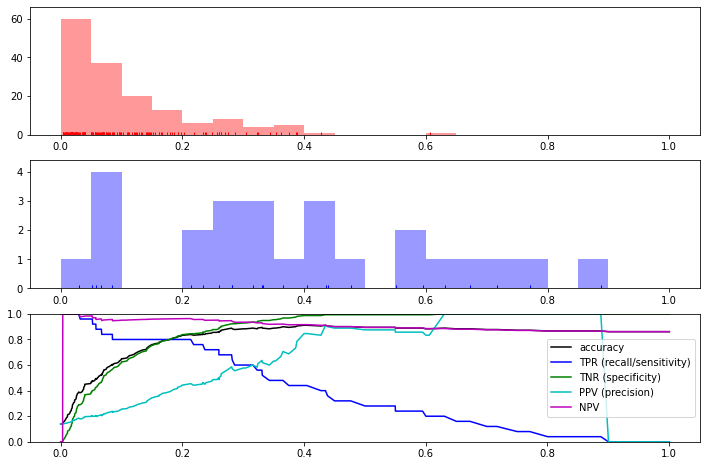

In [19]:
# TODO call make_plot_perf_vs_threshold(...)
lr3 = sklearn.linear_model.LogisticRegression(C = C_grid[bestC])
bestModel3 = lr3.fit(x_tr_M3,y_tr_M)
pred_va3 = bestModel3.predict_proba(x_va_N3)[::,1]

make_plot_perf_vs_threshold(y_va_N,pred_va3)

## Problem 1d: Decision Tree

### Model fitting code for decision tree 1d(i)

In [20]:
min_samples_leaf_grid = np.asarray([1, 2, 5, 10, 20, 50, 100, 200, y_tr_M.size])

tr_loss_list = list()
va_loss_list = list()
for min_samples_leaf in min_samples_leaf_grid:
    tree = sklearn.tree.DecisionTreeClassifier(
        criterion='entropy', min_samples_leaf=min_samples_leaf)

    # TODO fit, predict_proba, and compute logistic loss
    dsTree = tree.fit(x_tr_M3,y_tr_M)
    dsPredTr = dsTree.predict_proba(x_tr_M3)
    tr_loss_list.append(sklearn.metrics.log_loss(y_tr_M,dsPredTr))
    dsPredVa = dsTree.predict_proba(x_va_N3)
    va_loss_list.append(sklearn.metrics.log_loss(y_va_N,dsPredVa))

# TODO compute best value for min_samples_leaf
bestMinSample = np.argmin(va_loss_list)
print(bestMinSample)

6


### **1d(i):** Plot of logistic loss (y-axis) vs. min_samples_leaf (x-axis) on the training set and validation set. Which value of min_samples_leaf do you prefer? 

best min_samples_leaf with 3 feature data: 100.000


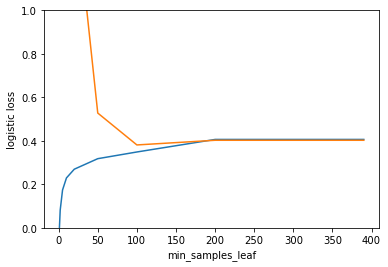

In [21]:
# TODO plot
plt.xlabel('min_samples_leaf');
plt.ylabel('logistic loss');
plt.ylim([0.0, 1.0]);
plt.plot(min_samples_leaf_grid,tr_loss_list)
plt.plot(min_samples_leaf_grid,va_loss_list)

print("best min_samples_leaf with 3 feature data: %.3f" % min_samples_leaf_grid[bestMinSample]) # TODO

###  **1d(ii):** Make a performance plot that shows how good your probabilistic predictions from the best 1c(iii) classifier are on the validation set. 

C:\Users\aashr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aashr\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\aashr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aashr\anaconda3\lib\site-packages\seaborn\distr

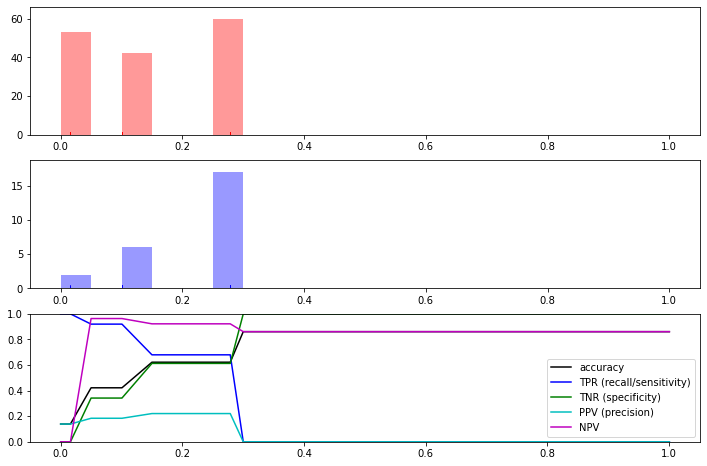

In [22]:
# TODO call make_plot_perf_vs_threshold
tree = sklearn.tree.DecisionTreeClassifier(
        criterion='entropy', min_samples_leaf=min_samples_leaf_grid[bestMinSample])
dsTree = tree.fit(x_tr_M3,y_tr_M)
dsPredTr = dsTree.predict_proba(x_tr_M3)
dsPredVa = dsTree.predict_proba(x_va_N3)[::,1]
dsPredTe = dsTree.predict_proba(x_te_N3)[::,1]

make_plot_perf_vs_threshold(y_va_N,dsPredVa)


# Problem 1e: ROC Curve analysis

### Problem 1e(i): ROC on Validation set

#### Validation LR3

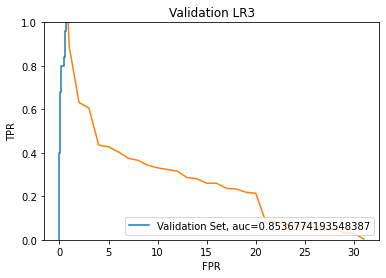

In [23]:
# TODO something like: fpr, tpr, thr = sklearn.metrics.roc_curve(...)
fpr, tpr,thr = sklearn.metrics.roc_curve(y_va_N,pred_va3)
auc = sklearn.metrics.roc_auc_score(y_va_N, pred_va3)
# fpr,tpr,thr
plt.ylim([0, 1]);
plt.xlabel("FPR");
plt.ylabel("TPR");
plt.plot(fpr,tpr,label="Validation Set, auc="+str(auc));
plt.plot(thr)
plt.legend(loc=4)
plt.title("Validation LR3")
plt.show()

#### Validation LR2

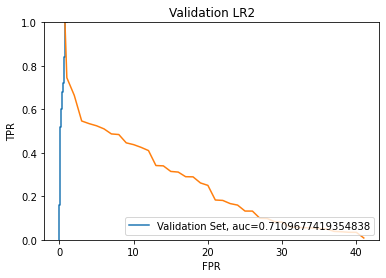

In [24]:
# TODO something like: fpr, tpr, thr = sklearn.metrics.roc_curve(...)
fpr, tpr,thr = sklearn.metrics.roc_curve(y_va_N,pred_va2)
auc = sklearn.metrics.roc_auc_score(y_va_N, pred_va2)
# fpr,tpr,thr
plt.ylim([0, 1]);
plt.xlabel("FPR");
plt.ylabel("TPR");
plt.plot(fpr,tpr,label="Validation Set, auc="+str(auc));
plt.plot(thr)
plt.legend(loc=4)
plt.title("Validation LR2")
plt.show()

### Problem 1e(ii): ROC on Test set

#### Test LR3

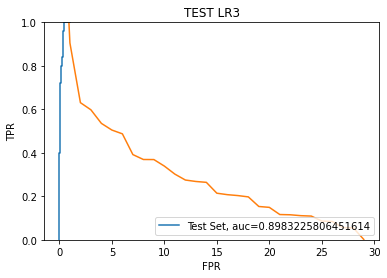

In [25]:
# TODO something like: fpr, tpr, thr = sklearn.metrics.roc_curve(...)
yPredProba = bestModel3.predict_proba(x_te_N3)[::,1]
fpr, tpr,thr= sklearn.metrics.roc_curve(y_te_N,  yPredProba)
auc = sklearn.metrics.roc_auc_score(y_te_N, yPredProba)
plt.ylim([0, 1]);
plt.xlabel("FPR");
plt.ylabel("TPR");
plt.plot(fpr,tpr,label="Test Set, auc="+str(auc))
plt.plot(thr)
plt.legend(loc=4)
plt.title("TEST LR3")
plt.show()

#### Test LR2

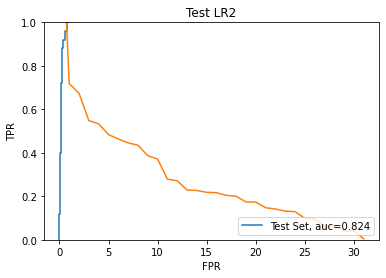

In [26]:
yPredProba = bestModel2.predict_proba(x_te_N2)[::,1]
fpr, tpr,thr= sklearn.metrics.roc_curve(y_te_N,  yPredProba)
auc = sklearn.metrics.roc_auc_score(y_te_N, yPredProba)
plt.ylim([0, 1]);
plt.xlabel("FPR");
plt.ylabel("TPR");
plt.plot(fpr,tpr,label="Test Set, auc="+str(auc))
plt.plot(thr)
plt.legend(loc=4)
plt.title("Test LR2")
plt.show()

### DSTREE TEST SET ROC

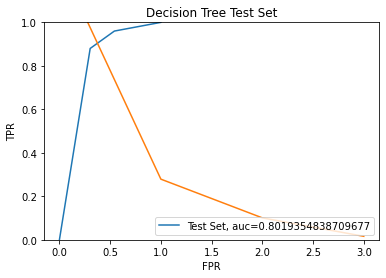

In [27]:
fpr, tpr,thr= sklearn.metrics.roc_curve(y_te_N,  dsPredTe)
auc = sklearn.metrics.roc_auc_score(y_te_N, dsPredTe)
plt.ylim([0, 1]);
plt.xlabel("FPR");
plt.ylabel("TPR");
plt.plot(fpr,tpr,label="Test Set, auc="+str(auc))
plt.plot(thr)
plt.legend(loc=4)
plt.title("Decision Tree Test Set")
plt.show()

### **1e(iii):** Short Answer: Compare the 3-feature LR to 2-feature LR models: does one dominate the other in terms of ROC performance?


**Answer**: Based on the ROC curve we have previously created, it can be inferred that the 3-feature LR is dominate over the 2-feature LR

### **1e(iv):** Short Answer: Compare the 3-feature DTree to 2-feature LR models: does one dominate the other in terms of ROC performance?


**Answer**: Based on the ROC curve, it can be inferred that the 2-feature LR model is dominate over the DSTree 


## Problem 1f: Selecting a decision threshold

### Problem 1f(i): Use default 0.5 threshold. Report perf. for 3-feature Logistic Regr.

In [28]:
best_thr = 0.5


print("ON THE VALIDATION SET:")
print("Chosen best thr = %.4f" % best_thr)
print("")
print("ON THE TEST SET:")
print(calc_confusion_matrix_for_threshold(y_te_N,bestModel3.predict_proba(x_te_N3)[::,1],best_thr))
print("")
print(print_perf_metrics_for_threshold(y_te_N,bestModel3.predict_proba(x_te_N3)[::,1],best_thr))

ON THE VALIDATION SET:
Chosen best thr = 0.5000

ON THE TEST SET:
Predicted    0   1
True              
0          152   3
1           15  10

0.900 ACC
0.400 TPR
0.981 TNR
0.769 PPV
0.910 NPV
None


### Problem 1f(ii): Pick threshold to maximize TPR s.t. PPV >= 0.98. Report perf. for 3-feature Logistic Regr.

In [29]:
# TODO thresh_grid, perf_grid = compute_perf_metrics_across_thresholds(...)

tresh_grid,pref_grid = compute_perf_metrics_across_thresholds(y_te_N,bestModel3.predict_proba(x_te_N3)[:,1])

# TODO Find threshold that makes TPR as large as possible, while satisfying PPV >= 0.98
maxTPR=0
for i in range(len(tresh_grid)):
 if(pref_grid['ppv'][i] <= 0.98):
    continue
 if pref_grid['tpr'][i] >= maxTPR:
  maxTPR = pref_grid['tpr'][i] 
  maxTPR_index = i


print("ON THE VALIDATION SET:")
print("Chosen best thr = %.4f" % tresh_grid[maxTPR_index]) # TODO
print("")
print("ON THE TEST SET:")
# TODO: print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_te_N,bestModel3.predict_proba(x_te_N3)[::,1],tresh_grid[maxTPR_index]))
print("")
print(calc_perf_metrics_for_threshold(y_te_N,bestModel3.predict_proba(x_te_N3)[:,1],tresh_grid[maxTPR_index]))
print("")
# TODO: print(print_perf_metrics_for_threshold(...))
print(print_perf_metrics_for_threshold(y_te_N,bestModel3.predict_proba(x_te_N3)[:,1],tresh_grid[maxTPR_index]))

ON THE VALIDATION SET:
Chosen best thr = 0.6307

ON THE TEST SET:
Predicted    0  1
True             
0          155  0
1           19  6

(0.8944444444439476, 0.23999999999904, 0.999999999999355, 0.9999999999833333, 0.8908045977006376)

0.894 ACC
0.240 TPR
1.000 TNR
1.000 PPV
0.891 NPV
None


### Problem 1f(iii): Pick threshold to maximize PPV s.t. TPR >= 0.98. Report perf. for 3-feature Logistic Regr.

In [30]:
# TODO thresh_grid, perf_grid = compute_perf_metrics_across_thresholds(...)

tresh_grid,pref_grid = compute_perf_metrics_across_thresholds(y_te_N,bestModel3.predict_proba(x_te_N3)[::,1])

# TODO Find threshold that makes TPR as large as possible, while satisfying PPV >= 0.98
maxPPV=0
for i in range(len(tresh_grid)):
 if(pref_grid['tpr'][i] <= 0.98):
    continue
 if pref_grid['ppv'][i] >= maxPPV:
  maxPPV = pref_grid['ppv'][i] 
  maxPPV_index = i


print("ON THE VALIDATION SET:")
print("Chosen best thr = %.4f" % tresh_grid[maxPPV_index]) # TODO
print("")
print("ON THE TEST SET:")
# TODO: print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_te_N,bestModel3.predict_proba(x_te_N3)[::,1],tresh_grid[maxPPV_index]))
print("")
print(calc_perf_metrics_for_threshold(y_te_N,bestModel3.predict_proba(x_te_N3)[::,1],tresh_grid[maxPPV_index]))
print("")
# TODO: print(print_perf_metrics_for_threshold(...))
print(print_perf_metrics_for_threshold(y_te_N,bestModel3.predict_proba(x_te_N3)[::,1],tresh_grid[maxPPV_index]))

ON THE VALIDATION SET:
Chosen best thr = 0.0549

ON THE TEST SET:
Predicted   0   1
True             
0          84  71
1           0  25

(0.6055555555552192, 0.9999999999960001, 0.5419354838706182, 0.2604166666663954, 0.9999999999988095)

0.606 ACC
1.000 TPR
0.542 TNR
0.260 PPV
1.000 NPV
None


### Problem 1f(iv): Compare the confusion matrices between 1f(i) - 1f(iii). Which thresholding strategy best meets our preferences from 1a: avoid life-threatening mistakes at all costs, while also eliminating unnecessary biopsies?

**Answer**: The confusion matrix of 1f(i) gives a better estimation than the 1f(iii) confusion matrix 

### Problem 1f(v): How many subjects in the test set are saved from unnecessary biopsies using your selected thresholding strategy? What fraction of current biopsies would be avoided if this classifier was adopted by the hospital?

**Answer**: TODO

# Problem 2: Concept Questions

## Problem 2a: Optimization

### 2a(i): Where is the ideal minimum of the function $f(x)$?


**Answer** : The slope cost function $h(x)$ is nearly equal to zero where the shape of curve is conver as we are searching the global minimum 

### 2a(ii): Does this gradient descent procedure converge? Explain your answer.M

**Answer** : Yes, the Gradient descent converges in logist regression by changing the $\theta$ at every iteration until we reach the global minimum where the $\theta$ makes the cost function is small as possible, but it also depends on the learning reate, as if the learning rate is extremely high it will no converge and will get stuck in local minimum


### 2a(iii): Can you propose a step length with which the optimization procedure converges?

**Answer**: The first thing we should consider is that the learning rate is between 0 and 1, as we are searching for a value that makes our converge, we need to carefuly choose a value which is in nearly the middle of our range to enable the model to reach the global minimum. But it is too low, it will certinaly converge but this will cost us much time, On the other hand, it's too high the model might not converge at all

## Problem 2b: Understanding Logistic Regression

### 2b(i): Explain why the illustration has problems (1-3 sentences).